In [31]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import os

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/robert/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.

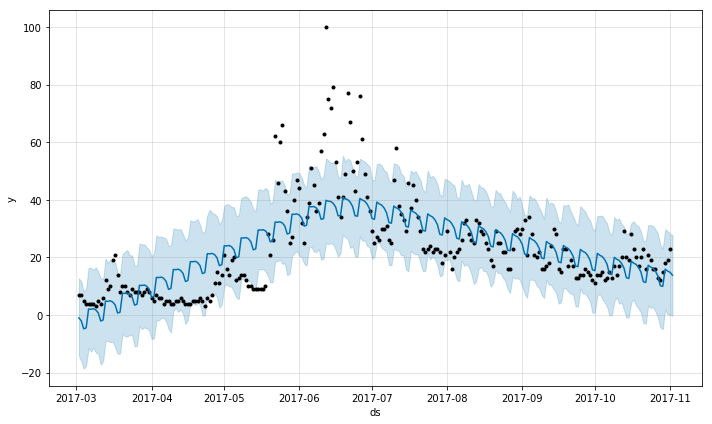

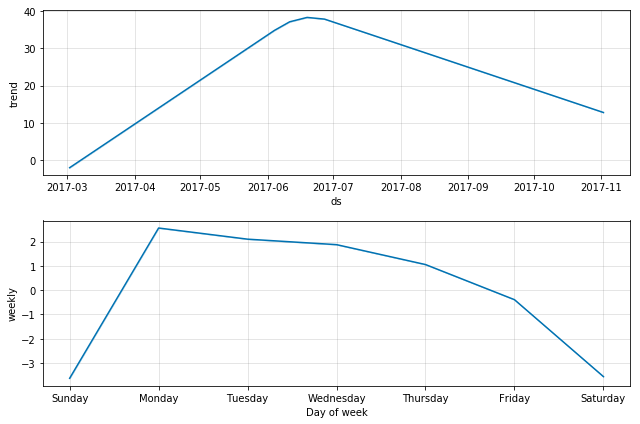

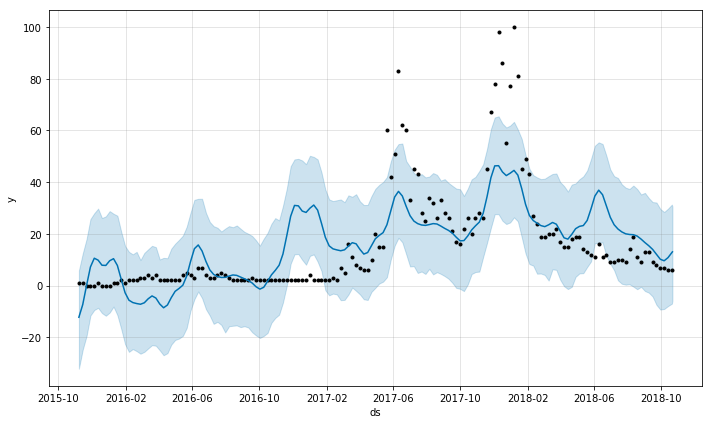

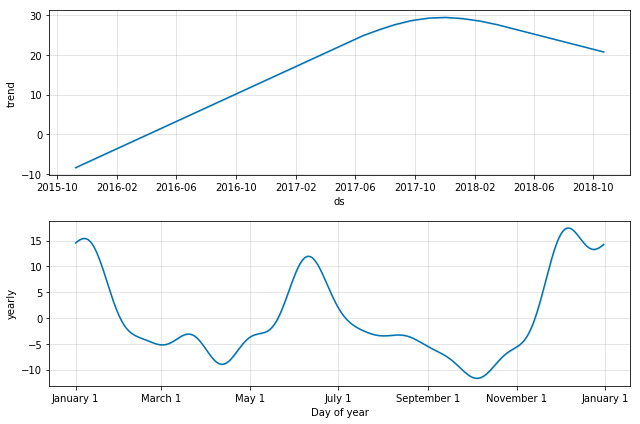

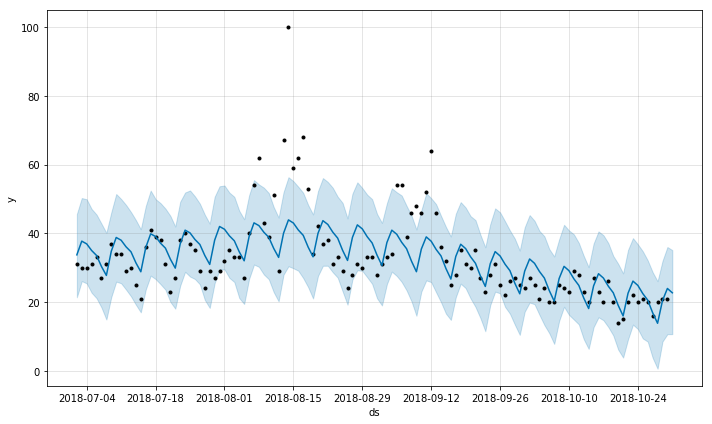

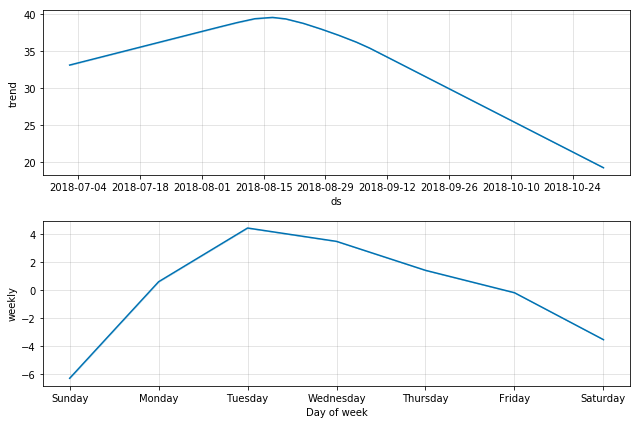

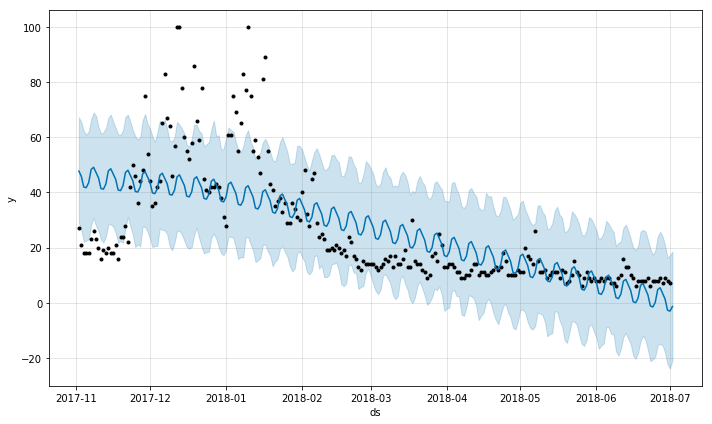

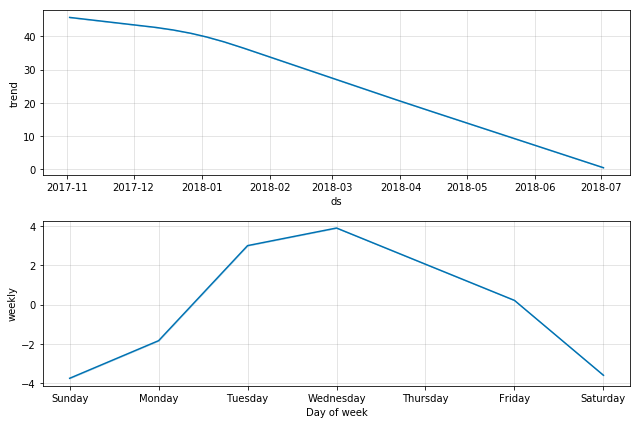

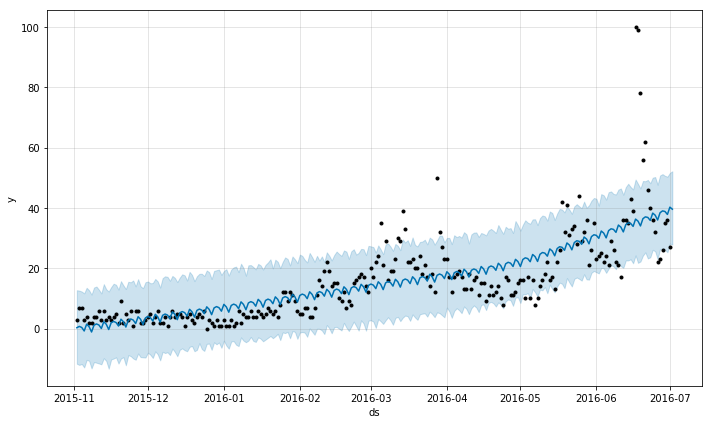

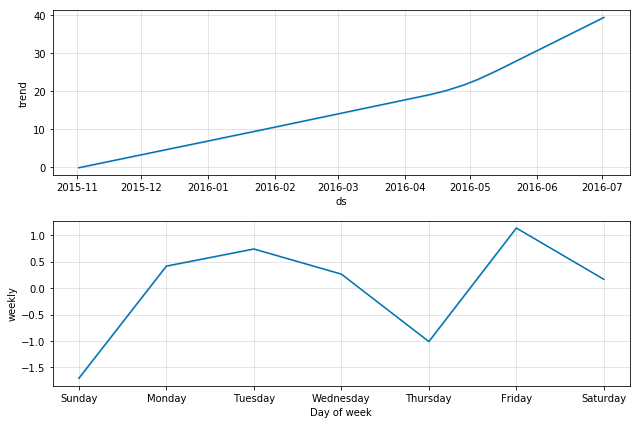

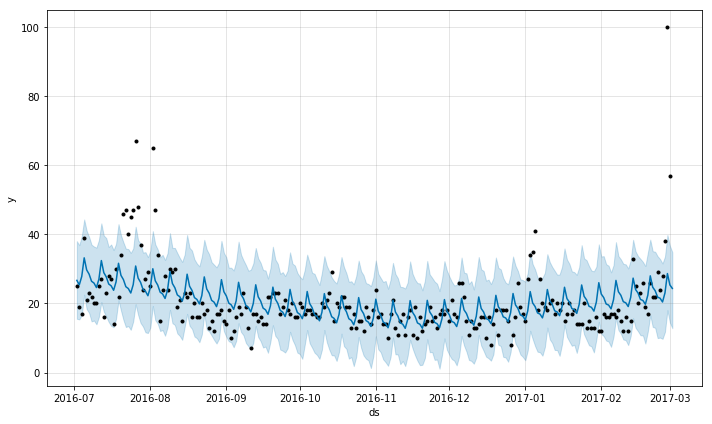

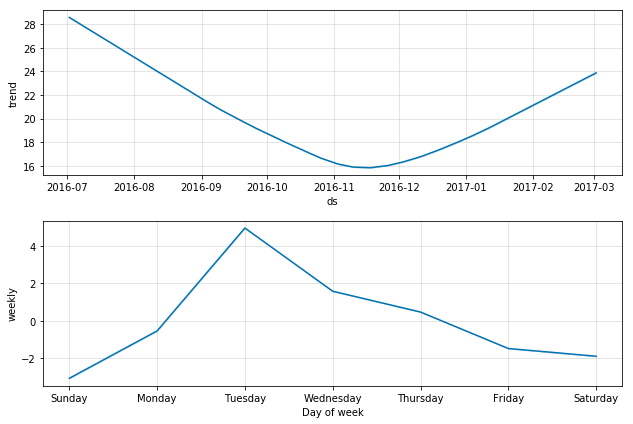

In [32]:
path = 'gtrends_data/'
for filename in os.listdir(path):
    if filename.startswith('eth'):
        df = pd.read_csv(path + filename, names=['ds','y'])
        df['y'] = df['y'].replace({"<1": "0"})
        df = df.iloc[3:]
        m = Prophet()
        m.fit(df)
        future = m.make_future_dataframe(periods=1)
        future.tail()
        forecast = m.predict(future)
        forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
        fig1 = m.plot(forecast)
        fig2 = m.plot_components(forecast)